# Tarea Estadística - Maestría en Ciencia de Datos, CUCEA, UdG
## Héctor Gabriel Sánchez Pérez
### 10 de Junio de 2025

Escribir el procedimiento completo (ecuaciones y variables utilizadas) para resolver los siguientes
problemas:


In [1]:
#Importar Librerías
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

1. (20 puntos) Calcular la media, mediana, moda y desviaci´on est´andar de los datos de la
Figura 1.


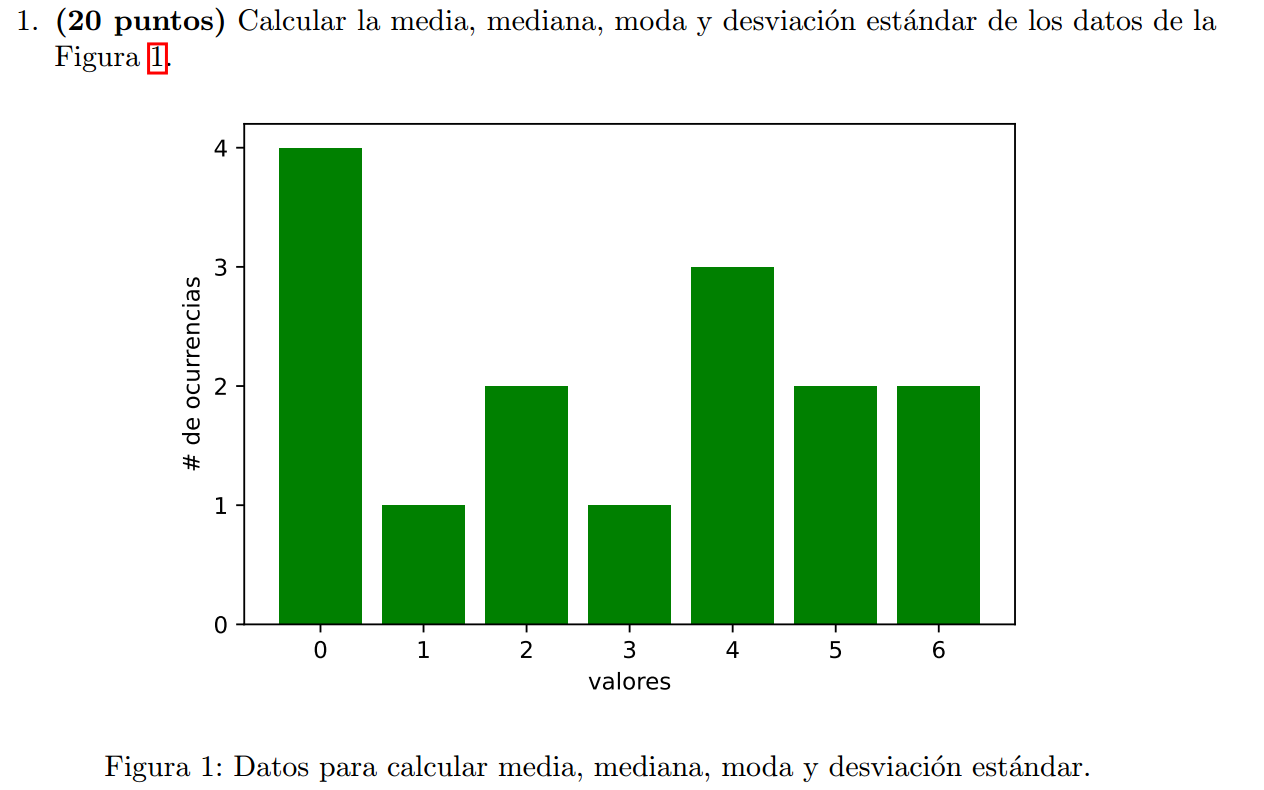

In [2]:
#Lista Orignial
lista_1_original = [4,1,2,1,3,2,2]

#Lista Ordenada de Menor a Mayor
lista_1_ordenada = sorted(lista_1_original)

#Promedio, mediana, moda y desviación estándar
average = np.mean(lista_1_ordenada)

median = np.median(lista_1_ordenada) 

mode = pd.Series(lista_1_ordenada).mode()[0] 

standard_deviation = np.std(lista_1_ordenada) 

print("Lista ordenada", lista_1_ordenada)
print("Promedio:", average)
print("Mediana:", median)
print("Moda:", mode)
print("Desviación estándar:", standard_deviation)



Lista ordenada [1, 1, 2, 2, 2, 3, 4]
Promedio: 2.142857142857143
Mediana: 2.0
Moda: 2
Desviación estándar: 0.989743318610787


---

2. (20 puntos) Un set de observaciones {x1, x2, x3, . . .} tiene una media de 52, una mediana
de 52.1, y una desviación estándar de 7. Se sabe que 8 % de los valores se encuentran por
encima de 66, mientras que 7.9 % de las observaciones se encuentran por debajo de 38.
Basado en esta información, describir el tipo de asimetría y curtosis de estos datos.

Respuesta: El hecho de que la mediana esté ligeramente por encima de la media, sugiere una asimetría negativa (cola más larga hacia la izquierda), aunque podemos decir que la distribución es casi simétrica porque los porcentajes de la cola son muy similares (7.9% vs 8.0%).

La curtosis mide que tan picuda o achatada es la distribución en comparación con una normal, y en una distribución normal, aproximadamente el 4.55% de los datos se encuentra a mas de dos desviaciones estandar, que dividido en 2, nos da 2.275%, y en el caso del ejemplo tenemos que hay mas datos en las colas de lo que se esperaría en una distribución normal (8% vs 7.9%), lo que indica que la curtosis es alta, es decir es una "Distribución Leptucórtica"

---

3. (20 puntos) En el archivo CardioGoodFitness.csv se muestran datos referentes a
clientes que han comprado uno de tres productos de una empresa de Fitness: TM195,
TM498, y TM798, Tomar los datos referentes al producto TM195 y calcular los cuartiles
Q1, Q2, Q3, Q4 de la variable de edad del cliente. En base a estos valores, calcular el rango
intercuartil IQR = Q3−Q1 y definir un rango que permita identificar si se encuentra algún
valor atípico y reportarlo.

In [3]:
cardio_original = pd.read_csv('../Datasets/CardioGoodFitness.csv')
cardio_original.head()
                     

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [4]:
#Archivo Cardio Filtrado

cardio_tm195 = cardio_original[cardio_original['Product'] == 'TM195']
cardio_tm195   

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
75,TM195,43,Male,16,Partnered,3,3,53439,66
76,TM195,44,Female,16,Single,3,4,57987,75
77,TM195,46,Female,16,Partnered,3,2,60261,47
78,TM195,47,Male,16,Partnered,4,3,56850,94


In [5]:
# Cuartiles de la variable Edad del cliente    
cardio_tm195['Age'].describe()


count    80.000000
mean     28.550000
std       7.221452
min      18.000000
25%      23.000000
50%      26.000000
75%      33.000000
max      50.000000
Name: Age, dtype: float64

In [6]:
print ("Cuartil Q1:", cardio_tm195['Age'].quantile(0.25))
print ("Cuartil Q2:", cardio_tm195['Age'].quantile(0.50))
print ("Cuartil Q3:", cardio_tm195['Age'].quantile(0.75))
print ("Cuartil Q4:", cardio_tm195['Age'].quantile(1.00))

# Rango intercuartil    
IQR = cardio_tm195['Age'].quantile(0.75) - cardio_tm195['Age'].quantile(0.25)
print("Rango intercuartil:", IQR)



Cuartil Q1: 23.0
Cuartil Q2: 26.0
Cuartil Q3: 33.0
Cuartil Q4: 50.0
Rango intercuartil: 10.0


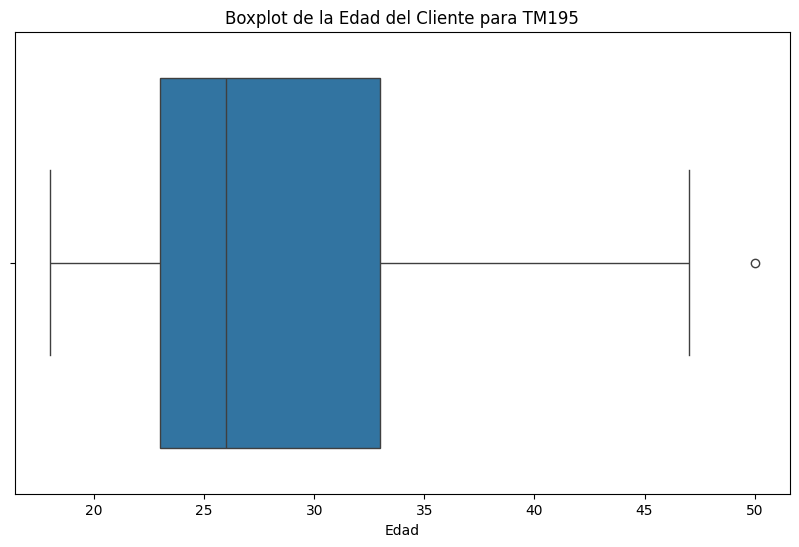

In [7]:
# Boxplot de la variable Edad del cliente

plt.figure(figsize=(10, 6))
sns.boxplot(x=cardio_tm195['Age'])
plt.title('Boxplot de la Edad del Cliente para TM195')
plt.xlabel('Edad')
plt.show() 

In [8]:
# Filtrado de datos atípicos para la variable Edad del cliente
outliers = cardio_tm195[(cardio_tm195['Age'] < cardio_tm195['Age'].quantile(0.25) - 1.5 * IQR) | 
                        (cardio_tm195['Age'] > cardio_tm195['Age'].quantile(0.75) + 1.5 * IQR)]
print("Datos atípicos (outliers):")
print(outliers[['Age', 'Product']])

Datos atípicos (outliers):
    Age Product
79   50   TM195


---

4. (20 puntos) Un set de observaciones {x1, x2, x3, . . .} tiene una media de 50 y una desviación estándar de 7. Según el teorema de Chebyshev, escribir si las siguientes afirmaciones son verdaderas o falsas:

* Al menos 75 % de las observaciones se encuentran entre 36 y 64.: VERDADERA
* Al menos 80 % de las observaciones se encuentran entre 34 y 66.: VERDADERA
* Al menos 88.9 % de las observaciones se encuentran entre 31 y 73.: FALSA
* Menos de 15 % de las observaciones se encuentran por debajo de 15.: VERDADERA

El Teorema de Chebyshev establece que para cualquier conjunto de observaciones, independientemente de la forma de su distribución, la proporción de observaciones que se encuentran a una distancia de k desviaciones estándar de la media es al menos 1 - (1/k^2).

El calculo del límite inferior es:
μ - kσ

El cálculo del iímite superior es:
μ + kσ

Para obtejer k a partir de límites conocidos, solo despejamos k


4.1- "Al menos 75 % de las observaciones se encuentran entre 36 y 64."
* El intervalo es [36, 64].
* Para el límite inferior: 36 = μ - kσ = 50 - k * 7 => -14 = -7k => k = 2.
* Para el límite superior: 64 = μ + kσ = 50 + k * 7 => 14 = 7k => k = 2.

Como k=2, aplicamos la fórmula de Chebyshev:
1 - (1/k^2) = 1 - (1/2^2) = 1 - (1/4) = 3/4 = 0.75.
Esto significa que al menos el 75 % de las observaciones se encuentran entre 36 y 64.

La afirmación coincide con lo que garantiza el teorema.

Conclusión: Verdadera

4.2- "Al menos 80 % de las observaciones se encuentran entre 34 y 66."
* El intervalo es [34, 66].
* Para el límite inferior: 34 = μ - kσ = 50 - k * 7 => -16 = -7k => k = 16/7.
* Para el límite superior: 66 = μ + kσ = 50 + k * 7 => 16 = 7k => k = 16/7.

Como k = 16/7, aplicamos la fórmula de Chebyshev:

1 - (1/(16/7)^2) = 1 - (1/(256/49)) = 1 - (49/256) = (256 - 49) / 256 = 207/256.
207/256 ≈ 0.80859, que es aproximadamente 80.86 %.

El teorema de Chebyshev garantiza que al menos 80.86 % de las observaciones están en este intervalo.

La afirmación dice "Al menos 80 %". Dado que 80.86 % es mayor que 80 %, al menos 80 % de los datos están en el intervalo.

Conclusión: Verdadera

4.3- "Al menos 88.9 % de las observaciones se encuentran entre 31 y 73."

* Para k=3, el intervalo simétrico alrededor de la media sería:
[μ - 3σ, μ + 3σ] = [50 - 37, 50 + 37] = [50 - 21, 50 + 21] = [29, 71].

1 - (1/3^3) = 8/9 = 88.89%

* Así, el teorema de Chebyshev garantiza que al menos 8/9 (≈ 88.89 %) de las observaciones se encuentran entre 29 y 71.
* Dado que las observaciones se encuentran fuera del rango, la afirmación es FALSA


4.4- "Menos de 15 % de las observaciones se encuentran por debajo de 15."

* Queremos evaluar la proporción P(X < 15).
* El valor 15 se encuentra a una distancia de la media: 15 = μ - kσ = 50 - k * 7.

* -35 = -7k => k = 5.

* El teorema de Chebyshev establece que P(|X - μ| ≥ kσ) ≤ 1/k^2.
* Para k=5: P(|X - 50| ≥ 5*7) ≤ 1/5^2.
* P(|X - 50| ≥ 35) ≤ 1/25 = 0.04, o 4 %.

Esto significa que la proporción de observaciones que están por debajo de μ - kσ (es decir, X ≤ 50 - 35 = 15) o por encima de μ + kσ (es decir, X ≥ 50 + 35 = 85) es como máximo 4 %.

P(X ≤ 15 o X ≥ 85) ≤ 4 %.

Por lo tanto, la proporción de observaciones que se encuentran solo por debajo de 15, P(X ≤ 15), debe ser menor o igual a este 4 %. (P(X < 15) ≤ P(X ≤ 15 o X ≥ 85)).

Entonces, P(X < 15) ≤ 4 %.

La afirmación es "Menos de 15 % ... por debajo de 15". Dado que Chebyshev garantiza que como máximo el 4 % está por debajo de 15, y 4 % es ciertamente "menos de 15 %", la afirmación es consistente con el teorema.

Conclusión: Verdadera

---

5. En el Cuadro 1 se muestra el nÚmero de nacimientos en Jalisco entre los años 2010 y 2018. Un diagrama de dispersión de núumero de nacimientos vs año se muestra en la
Figura 2. Calcular el coeficiente de correlación de Pearson entre el número de nacimientos y el año. En base al resultado, describir la magnitud y el tipo de correlación que presentan los datos.

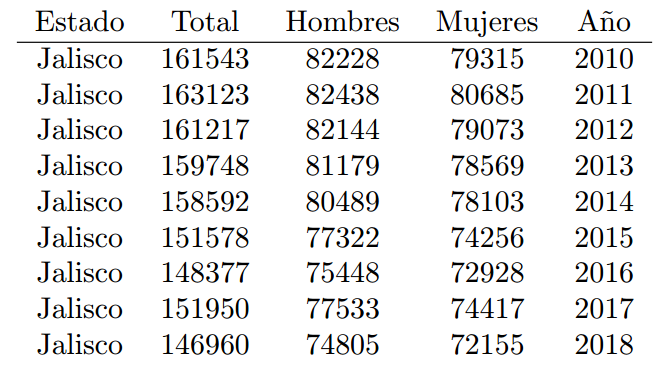 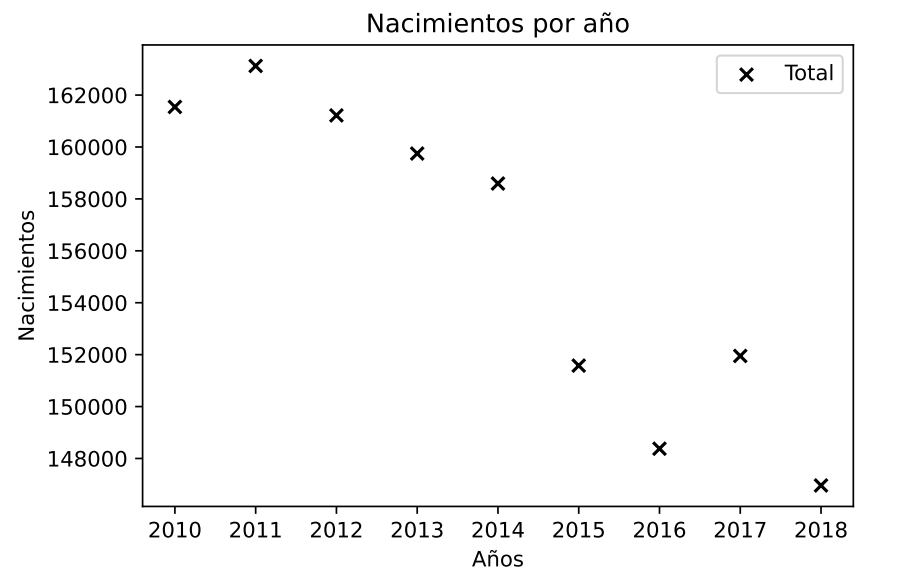

In [15]:
# Diccionario de nacimientos en Jalisco 
nacimientos = {
    'Estado': ['Jalisco', 'Jalisco', 'Jalisco', 'Jalisco', 'Jalisco', 'Jalisco', 'Jalisco', 'Jalisco', 'Jalisco'],
    'Total': [161543, 163123, 161217, 159748, 158592, 141578, 148377, 151950, 146960],
    'Hombres': [82228, 82438, 82144, 81179, 80489, 77322, 75448, 77533, 74805],
    'Mujeres': [79315, 80685,79073, 78569, 78103,74256, 72928, 74417, 72155],
    'Año': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
}

nacimientos_df = pd.DataFrame(nacimientos)
nacimientos_df  

,Estado,Total,Hombres,Mujeres,Año
0,Jalisco,161543,82228,79315,2010
1,Jalisco,163123,82438,80685,2011
2,Jalisco,161217,82144,79073,2012
3,Jalisco,159748,81179,78569,2013
4,Jalisco,158592,80489,78103,2014
5,Jalisco,141578,77322,74256,2015
6,Jalisco,148377,75448,72928,2016
7,Jalisco,151950,77533,74417,2017
8,Jalisco,146960,74805,72155,2018


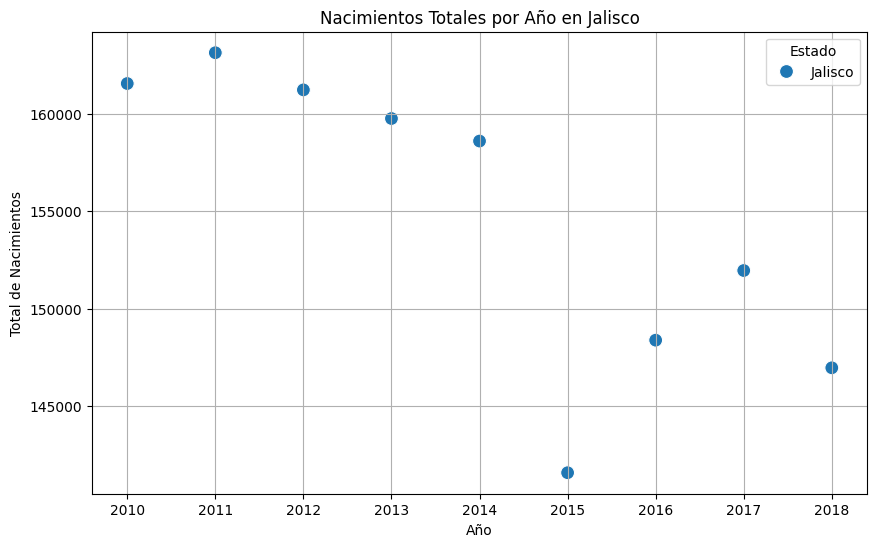

In [12]:
# Diagrama de dispersión de nacimientos por año
plt.figure(figsize=(10, 6))
sns.scatterplot(data=nacimientos_df, x='Año', y='Total', hue='Estado', style='Estado', s=100)
plt.title('Nacimientos Totales por Año en Jalisco')
plt.xlabel('Año')
plt.ylabel('Total de Nacimientos')
plt.legend(title='Estado')
plt.grid(True)
plt.show()

Coeficiente de correlación de Pearson entre Total de Nacimientos y Año: -0.7992569438902929


<Figure size 1000x600 with 0 Axes>

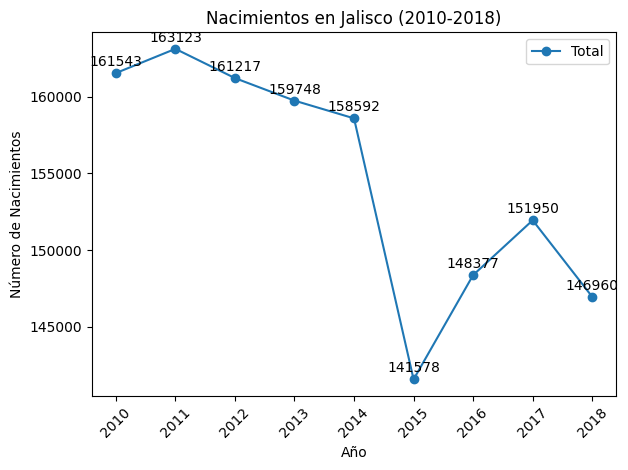

In [29]:
# Coeficiente de correlación de Pearsonentre el número de nacimientos y el año
correlation = nacimientos_df['Total'].corr(nacimientos_df['Año'], method='pearson')
print("Coeficiente de correlación de Pearson entre Total de Nacimientos y Año:", correlation)
# Diagrama de barras de nacimientos por género
plt.figure(figsize=(10, 6))
ax = nacimientos_df.set_index('Año')[['Total']].plot(kind='line', marker='o')

# Agregar etiquetas encima de cada marcador
for x, y in zip(nacimientos_df['Año'], nacimientos_df['Total']):
    ax.annotate(f'{y}', (x, y), textcoords="offset points", xytext=(0,5), ha='center')

plt.title('Nacimientos en Jalisco (2010-2018)')
plt.xlabel('Año')
plt.ylabel('Número de Nacimientos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Los datos de nacimientos y año presentan una correlación negativa.


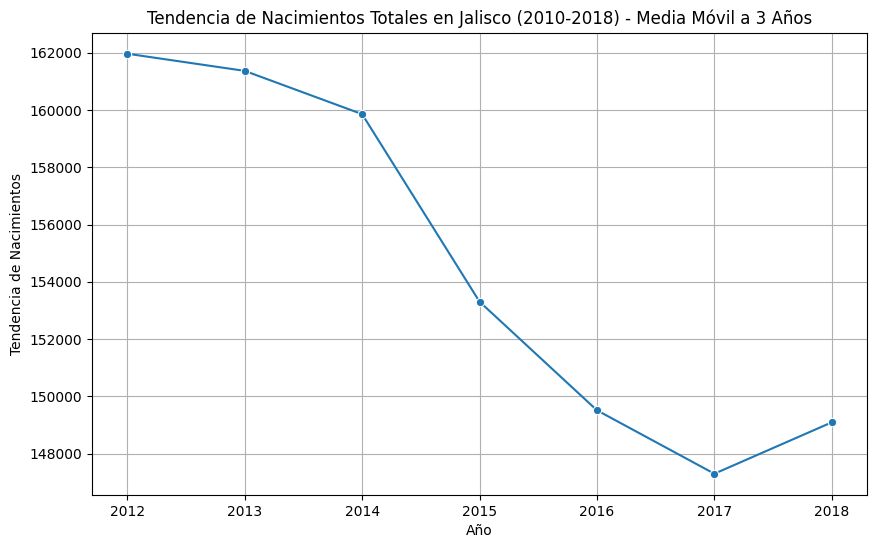

In [20]:
# Tipo de correlación que presentan los datos de nacimientos vs año
if correlation > 0:
    print("Los datos de nacimientos y año presentan una correlación positiva.")
elif correlation < 0:
    print("Los datos de nacimientos y año presentan una correlación negativa.")
else:
    print("Los datos de nacimientos y año no presentan correlación.")
# Análisis de la tendencia de nacimientos a lo largo de los años (Media Movil a 3 años)
nacimientos_df['Tendencia'] = nacimientos_df['Total'].rolling(window=3).mean()
plt.figure(figsize=(10, 6))
sns.lineplot(data=nacimientos_df, x='Año', y='Tendencia', marker='o')
plt.title('Tendencia de Nacimientos Totales en Jalisco (2010-2018) - Media Móvil a 3 Años')
plt.xlabel('Año')
plt.ylabel('Tendencia de Nacimientos')
plt.grid(True)
plt.show()